<a href="https://colab.research.google.com/github/AmeniZoueri/Resume_Selection_Naive_Bayes/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install nltk
!pip install nltk

In [2]:
# install gensim
!pip install gensim

In [3]:
!pip install wordcloud

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
# load the data
resume_df=pd.read_csv('resume.csv', encoding='latin-1')
resume_df

,resume_id,class,resume_text
0,resume_1,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...
2,resume_3,not_flagged,\rLTS Software Engineer Computational Lithogra...
3,resume_4,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,resume_5,flagged,\rIndependent Consultant - Self-employed\rBurl...
...,...,...,...
120,resume_121,not_flagged,\rBrattleboro VT - Email me on Indeed: indeed....
121,resume_122,not_flagged,\rResearch and Teaching Assistant - University...
122,resume_123,not_flagged,\rMedical Coder - Highly Skilled - Entry Level...
123,resume_124,flagged,\rWaterbury VT - Email me on Indeed: indeed.co...


In [6]:
# data containing resume
# data containing resume
resume_df=resume_df[['resume_text','class']]
resume_df

,resume_text,class
0,\rCustomer Service Supervisor/Tier - Isabella ...,not_flagged
1,\rEngineer / Scientist - IBM Microelectronics ...,not_flagged
2,\rLTS Software Engineer Computational Lithogra...,not_flagged
3,TUTOR\rWilliston VT - Email me on Indeed: ind...,not_flagged
4,\rIndependent Consultant - Self-employed\rBurl...,flagged
...,...,...
120,\rBrattleboro VT - Email me on Indeed: indeed....,not_flagged
121,\rResearch and Teaching Assistant - University...,not_flagged
122,\rMedical Coder - Highly Skilled - Entry Level...,not_flagged
123,\rWaterbury VT - Email me on Indeed: indeed.co...,flagged


In [7]:
# obtain dataframe information
resume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   resume_text  125 non-null    object
 1   class        125 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB


In [8]:
# check for null values
resume_df.isnull().sum()

resume_text    0
class          0
dtype: int64

In [9]:
resume_df['class'].value_counts()

not_flagged    92
flagged        33
Name: class, dtype: int64

In [10]:
resume_df['class']= resume_df['class'].apply(lambda x:1 if x=='flagged' else 0)
resume_df

<ipython-input-10-9cdcf24525cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resume_df['class']= resume_df['class'].apply(lambda x:1 if x=='flagged' else 0)


,resume_text,class
0,\rCustomer Service Supervisor/Tier - Isabella ...,0
1,\rEngineer / Scientist - IBM Microelectronics ...,0
2,\rLTS Software Engineer Computational Lithogra...,0
3,TUTOR\rWilliston VT - Email me on Indeed: ind...,0
4,\rIndependent Consultant - Self-employed\rBurl...,1
...,...,...
120,\rBrattleboro VT - Email me on Indeed: indeed....,0
121,\rResearch and Teaching Assistant - University...,0
122,\rMedical Coder - Highly Skilled - Entry Level...,0
123,\rWaterbury VT - Email me on Indeed: indeed.co...,1


In [11]:
# download nltk packages
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
# download nltk packages
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
# Get additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from','subject','re','edu','use','email','com'])

In [14]:
# Remove stop words and remove words with 2 or less characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)

    return ' '.join(result)

In [15]:
# Cleaned text
resume_df['cleaned']= resume_df['resume_text'].apply(preprocess)


In [16]:
resume_df

,resume_text,class,cleaned
0,\rCustomer Service Supervisor/Tier - Isabella ...,0,customer service supervisor tier isabella cata...
1,\rEngineer / Scientist - IBM Microelectronics ...,0,engineer scientist ibm division westford alber...
2,\rLTS Software Engineer Computational Lithogra...,0,lts software engineer computational lithograph...
3,TUTOR\rWilliston VT - Email me on Indeed: ind...,0,tutor williston alec schwartz work experience ...
4,\rIndependent Consultant - Self-employed\rBurl...,1,independent consultant self employed burlingto...
...,...,...,...
120,\rBrattleboro VT - Email me on Indeed: indeed....,0,brattleboro bcc skilled presenter trainer micr...
121,\rResearch and Teaching Assistant - University...,0,research teaching assistant university vermont...
122,\rMedical Coder - Highly Skilled - Entry Level...,0,medical coder highly skilled entry level sudbu...
123,\rWaterbury VT - Email me on Indeed: indeed.co...,1,waterbury bec willing relocate authorized work...


In [17]:
print(resume_df['cleaned'][0])

customer service supervisor tier isabella catalog company south burlington aecf work experience customer service supervisor tier isabella catalog company shelburne august present customer service visual set display website maintenance supervise customer service team popular catalog company manage day day issues resolution customer upset ensure customer satisfaction troubleshoot order shipping issues lost transit order errors damages manage resolve escalated customer calls ensure customer satisfaction assist customers order placing cross selling upselling catalog merchandise set display sample merchandise catalog library customer pick area facility website clean adding images type product information proofreading administrative assistant events coordinator office services assistant eileen fisher irvington february july support director architecture architecture coordinator daily activities including preparing monthly expense reports scheduling calendar maintenance arranging aspects trav

In [18]:
print(resume_df['resume_text'][0])

Providing more than 15 years of combined office services with a focus on Administrative Assistance Customer Service Event Coordination Trade Show Coordination and Facilitating


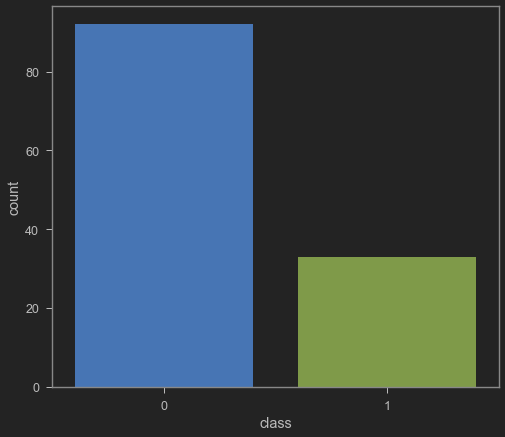

In [ ]:
# Plot the counts of flagged vs not flagged
sns.countplot(resume_df['class'],label = 'Count Plot')

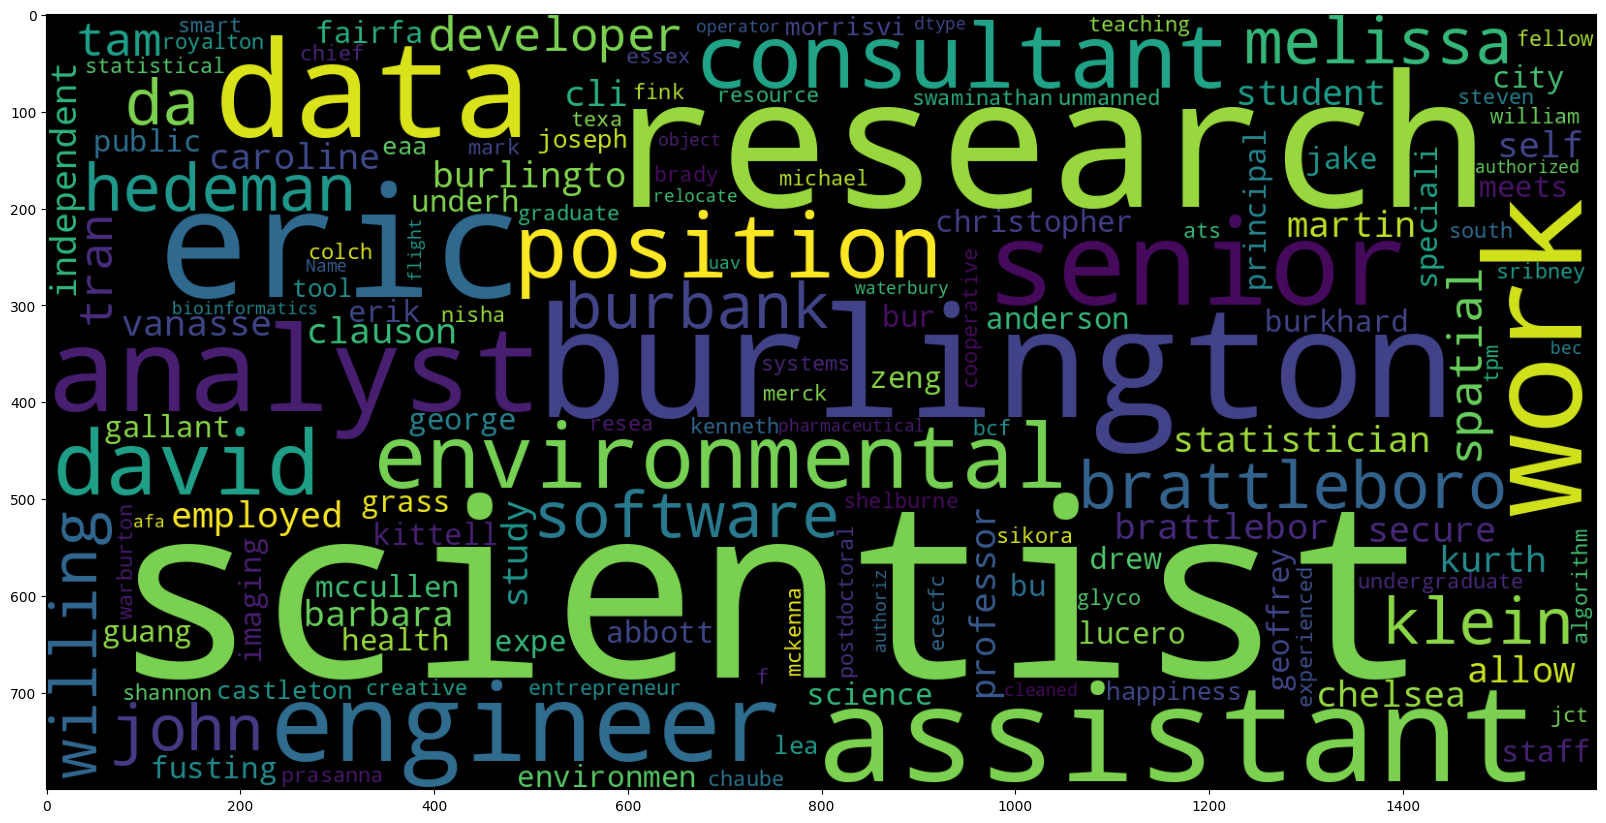

In [19]:
# plot the word cloud for text that is flagged
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1600,height=800, stopwords= stop_words).generate(str(resume_df[resume_df['class']==1].cleaned))
plt.imshow(wc)

In [20]:

# CountVectorizer example
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']
vectorizer=CountVectorizer ()
X=vectorizer.fit_transform(sample_data)

In [21]:
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [22]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [23]:
# Applying CountVectorier to the cleaned text
vectorizer = CountVectorizer()
countvectorizer = vectorizer.fit_transform(resume_df['cleaned'])


In [24]:
print(vectorizer.get_feature_names_out())

['aaalac' 'aabb' 'aac' ... 'ãæcomputer' 'ètravel' 'ô_torrent']


In [25]:
print(countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [26]:
X=countvectorizer


In [27]:
y=resume_df['class']

In [28]:
X.shape

(125, 10383)

In [30]:
y.shape

(125,)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


In [34]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier=MultinomialNB()
NB_classifier.fit(X_train, y_train)


MultinomialNB()

<Axes: >

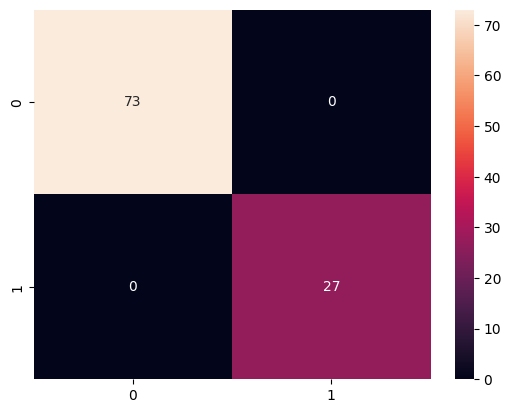

In [36]:
# Predicting the performance on train data
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)

<Axes: >

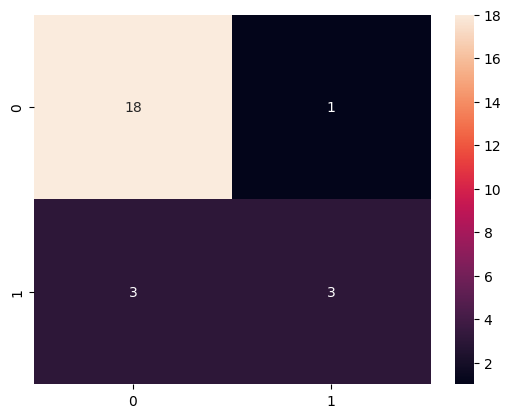

In [37]:
# Predicting the performance on test data
y_predict_test = NB_classifier.predict(X_test)
y_predict_test
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [ ]:
# classification report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.67      0.67      0.67         6

    accuracy                           0.84        25
   macro avg       0.78      0.78      0.78        25
weighted avg       0.84      0.84      0.84        25



the model is trained on a small data set, it is a small project, however the results will be better if I had a larger data set to train the model on.